<a href="https://colab.research.google.com/github/frapasti/Embedded-Person-detection/blob/main/ImportCOCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fiftyone --no-binary fiftyone,voxel51-eta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 508 kB 53.1 MB/s 
     |████████████████████████████████| 79.9 MB 127 kB/s 
     |████████████████████████████████| 226 kB 41.5 MB/s 
     |████████████████████████████████| 47 kB 5.9 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 534 kB 59.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133 kB 65.2 MB/s 
     |████████████████████████████████| 13.2 MB 51.3 MB/s 
     |████████████████████████████████| 135 kB 37.3 MB/s 
     |███████████

In [2]:
import fiftyone as fo

NumExpr defaulting to 2 threads.
Migrating database to v0.16.2


In [3]:
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["person"],
    only_matching = True,
    max_samples=50,
)

 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 746.2Mb/s]      
Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |████████████████████| 50/50 [2.3s elapsed, 0s remaining, 23.9 images/s]      
Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/root/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████████| 50/50 [275.9ms elapsed, 0s remaining, 188.3 samples/s]      
Dataset 'coco-2017-validation-50' created


In [4]:
session = fo.launch_app(dataset)

In [5]:
print(dataset)

Name:        coco-2017-validation-50
Media type:  image
Num samples: 50
Persistent:  False
Tags:        ['validation']
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [6]:
print(dataset.media_type)

image


"image_id": 8211,"bbox": [141.29,161.45,110.76,149.48],"category_id": 4,"id": 365145



"image_id": 8211,"bbox": [322.48,250.87,55.11,93.93],"category_id": 62,"id": 376792

In [7]:
print(dataset.info.keys())

dict_keys(['description', 'url', 'version', 'year', 'contributor', 'date_created', 'licenses', 'categories'])


In [8]:
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

person category = '1' bbox form = [x,y,width,height]

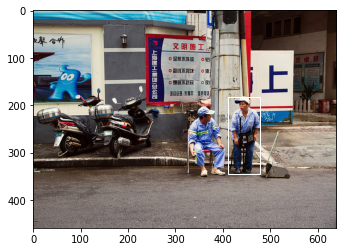

In [9]:
image = load_img('/root/fiftyone/coco-2017/validation/data/000000008211.jpg')
data = pyplot.imread('/root/fiftyone/coco-2017/validation/data/000000008211.jpg')
pyplot.imshow(data)


x1, y1, width, height = 411.89, 181.48, 67.06, 163.86
rect = Rectangle((x1, y1), width, height, fill=False, color='white')
ax = pyplot.gca()
ax.add_patch(rect)
pyplot.show()

The subsequent cells extract from the Coco dataset that has been downloaded the images that are stored into arrays and added to evry_img (Can be seen as X_train) and maps the corresponding bounding boxes in a Y_train list (bboxes)

bboxes has dimensions 4( size of each bounding box) * 10 (max number of bounding boxes per image) * 50( total number of images in the test dataset) 

In [10]:
import json
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

In [11]:
f = open('/root/fiftyone/coco-2017/validation/labels.json')

In [12]:
data = json.load(f)

In [13]:
annotations = data['annotations']
every_path = []
cols = 10
rows = 50
bbox_size = 4
counters = [1] * rows
bboxes = [[[0 for k in range(bbox_size)] for j in range(cols)] for i in range(rows)] 
items = 0
#creation of the list of paths of images in the dataset
for entry in data['annotations']:
    class_id = entry['category_id']
    if (class_id == 1):
        img_id = entry['image_id']
        path = float(img_id)/pow(10,11)
        dec_path = format(path, '.11f')
        final_path = ''
        final_path = '/root/fiftyone/coco-2017/validation/data/'+ dec_path.replace('.', '') + '.jpg'
        if(every_path.count(final_path) == 0):
          every_path.append(final_path)
          bboxes[items][0] = entry['bbox']
          items = items + 1
        else:
          index = every_path.index(final_path)
          if(counters[index] + 1 < 10):
            bboxes[index][counters[index]] = entry['bbox']
            counters[index] = counters[index] + 1
every_img = []
for i in range(0, rows):
    image = load_img(every_path[i], target_size=(416, 416))
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    image = expand_dims(image, 0)
    every_img.append(image)

In [14]:
X_train = np.array(every_img)
Y_train = np.array(bboxes)

print(X_train.shape)
print(Y_train.shape)

(50, 1, 416, 416, 3)
(50, 10, 4)


First Implementation of a YOLO Neural Network

In [15]:
from keras.models import Sequential  # Model type to be used

import tensorflow as tf
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [16]:
yolov1 = Sequential()
yolov1.add(tf.keras.layers.Conv2D(64, (7, 7), padding="same", activation="relu", input_shape=(1,416,416,3), strides=(2, 2)))
yolov1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

ValueError: ignored